<a href="https://colab.research.google.com/github/aryanfarswan77/prasunet/blob/main/SVM_Classification_for_Images(Cats_and_Dogs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3: Classifiy Cats and Dog Images using SVM
Implement a support vector machine (SVM) to classify images of cats and dogs.

## Data Collection
Source: [Dataset](https://www.kaggle.com/c/dogs-vs-cats/data)

###Importing the Dataset
Using kaggle API to import the dataset to the notebook

In [ ]:
import os
import zipfile
from google.colab import files

In [ ]:
# Upload kaggle API file (in Json format)
files.upload();

Saving kaggle.json to kaggle.json


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 99% 803M/812M [00:09<00:00, 137MB/s]
100% 812M/812M [00:09<00:00, 90.8MB/s]


In [ ]:
zip_ref = zipfile.ZipFile('dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
zip_ref = zipfile.ZipFile('train.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
IMAGE_FOLDER_PATH = "/content/train"
FILE_NAMES = os.listdir(IMAGE_FOLDER_PATH)
print('There are {} number of images in directory.'.format(len(FILE_NAMES)))

There are 25000 number of images in directory.


## Converting Data Directory in a Dataframe

In [ ]:
import pandas as pd

targets = list()
full_paths = list()
train_cats_dir = list()
train_dogs_dir = list()

# finding each file's target
for file_name in FILE_NAMES:
    target = file_name.split(".")[0] # target name
    full_path = os.path.join(IMAGE_FOLDER_PATH, file_name)

    if(target == "dog"):
        train_dogs_dir.append(full_path)
    if(target == "cat"):
        train_cats_dir.append(full_path)

    full_paths.append(full_path)
    targets.append(target)

dataset = pd.DataFrame() # make dataframe
dataset['image_path'] = full_paths # file path
dataset['target'] = targets # file's target

In [ ]:
train_cats_dir[:5]

['/content/train/cat.5842.jpg',
 '/content/train/cat.7370.jpg',
 '/content/train/cat.5159.jpg',
 '/content/train/cat.2093.jpg',
 '/content/train/cat.6237.jpg']

In [ ]:
train_dogs_dir[:5]

['/content/train/dog.5970.jpg',
 '/content/train/dog.2406.jpg',
 '/content/train/dog.3699.jpg',
 '/content/train/dog.155.jpg',
 '/content/train/dog.3595.jpg']

In [ ]:
dataset.head()

,image_path,target
0,/content/train/cat.5842.jpg,cat
1,/content/train/cat.7370.jpg,cat
2,/content/train/cat.5159.jpg,cat
3,/content/train/dog.5970.jpg,dog
4,/content/train/cat.2093.jpg,cat


In [ ]:
len(dataset)

25000

In [ ]:
print("total data counts:", dataset['target'].count())
counts = dataset['target'].value_counts()
print(counts)

total data counts: 25000
target
cat    12500
dog    12500
Name: count, dtype: int64


## Visualising the Data Images

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

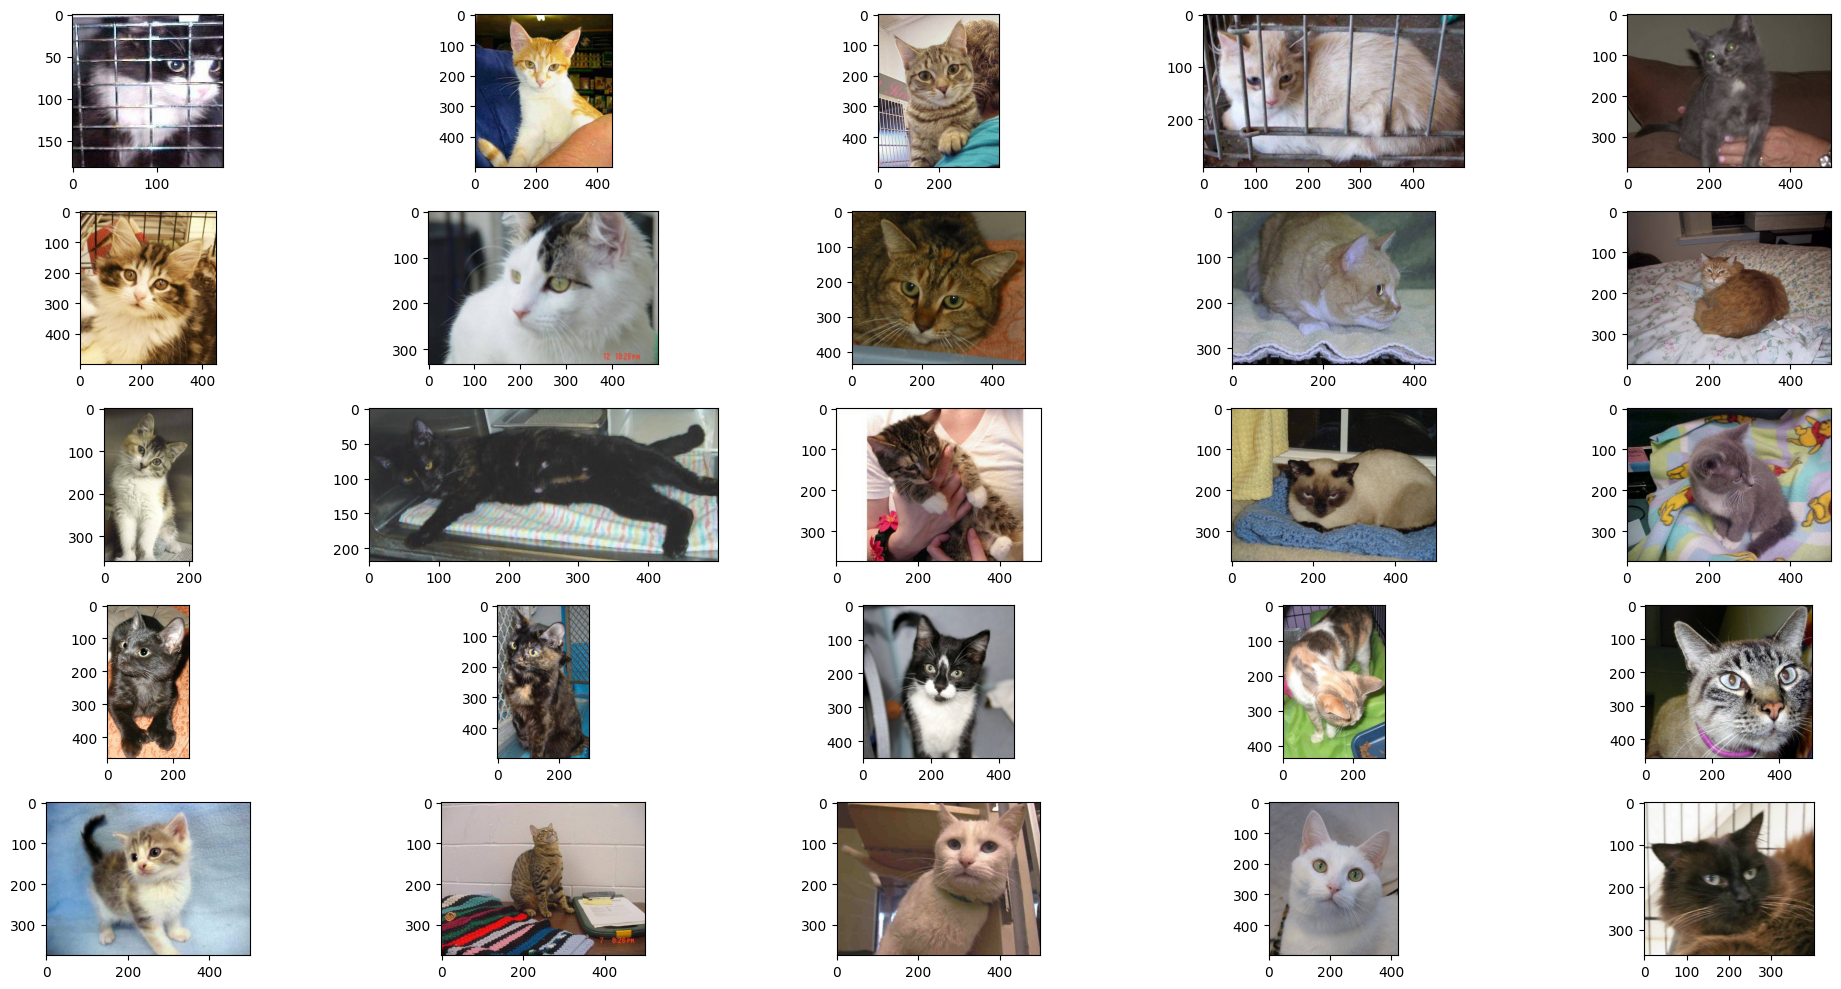

In [ ]:
# Visualising Images of Cats

rows = 5
cols = 5
axes = []
fig=plt.figure(figsize=(20,10))
i = 0

for a in range(rows*cols):
    b = mpimg.imread(train_cats_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1

fig.tight_layout()
plt.show()

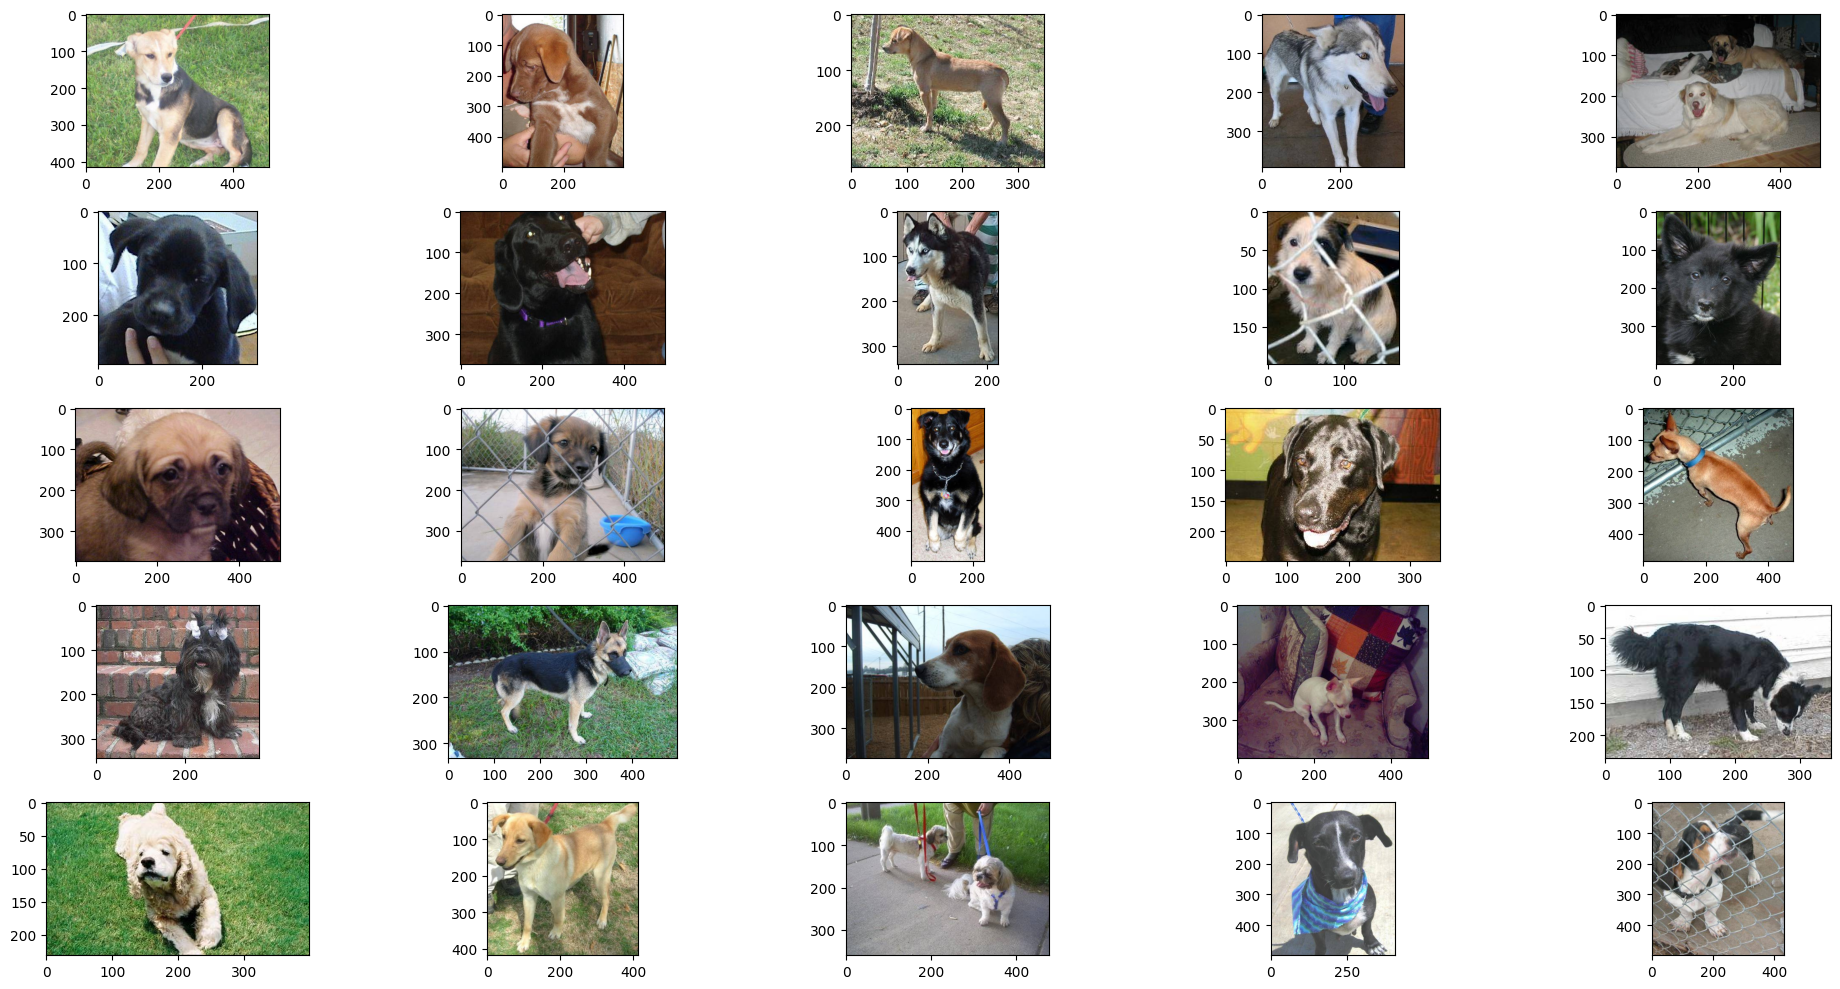

In [ ]:
# Visualising Images of Dogs

rows = 5
cols = 5
axes = []
fig=plt.figure(figsize=(20,10))
i = 0

for a in range(rows*cols):
    b = mpimg.imread(train_dogs_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1

fig.tight_layout()
plt.show()

## Data Pre-processing

### Pre-processing Images
* Resizing
* Flattening

In [ ]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from tqdm import tqdm

In [ ]:
def preprocess_image(image_path):
    img = imread(image_path)
    # Resize the image to a fixed size
    img = resize(img, (50,50))
    # Flatten the image to a 1D array
    img_flat = img.flatten()
    return img_flat

In [ ]:
X = []
y = dataset['target']
for image_path in tqdm(dataset['image_path']):
    X.append(preprocess_image(image_path))

100%|██████████| 25000/25000 [08:50<00:00, 47.14it/s]


In [ ]:
X = np.array(X)

### Using PCA for Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)

###Splitting into Train-Test sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

## Building the Model

In [ ]:
from sklearn import svm

###Creating Model

In [ ]:
Dog_Cat_classifier = svm.SVC(kernel='rbf')
Dog_Cat_classifier.fit(X_train, y_train)

SVC()

###Predicting Results

In [ ]:
y_pred = Dog_Cat_classifier.predict(X_test)
y_pred

array(['dog', 'cat', 'dog', ..., 'dog', 'cat', 'dog'], dtype=object)

##Evaluating Model

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Visualising Model Results

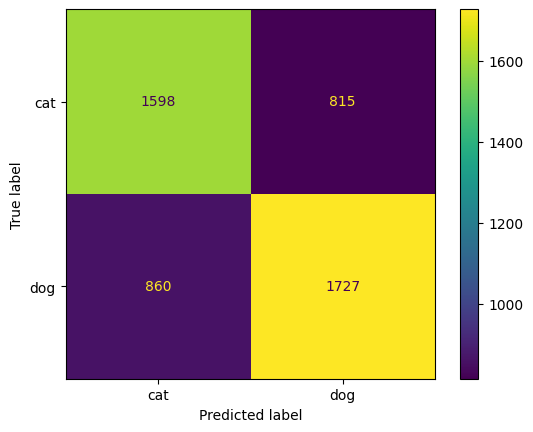

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['cat', 'dog'])
disp.plot()
plt.show()

### Calculating Model Accuracy

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.665
